In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Müstəqil Nümunə T testi - Independent-Sample T test

In [2]:
sp = pd.read_csv("spanish.csv")

sp.head()

,course,score
0,no,66
1,no,41
2,no,51
3,no,34
4,no,60


In [3]:
group1 = sp[sp['course'] == 'yes']['score']
group2 = sp[sp['course'] == 'no']['score']
levene_stat, levene_p = stats.levene(group1, group2)

In [4]:
print("Levene's Test for Homogeneity of Variances:")
print(f"Statistic: {levene_stat:.4f}")
print(f"p-value: {levene_p:.4f}")

Levene's Test for Homogeneity of Variances:
Statistic: 0.8947
p-value: 0.3451


In [5]:
t_stat_eq, p_val_eq = stats.ttest_ind(group1, group2, equal_var=True)
t_stat_welch, p_val_welch = stats.ttest_ind(group1, group2, equal_var=False)

In [6]:
print("\nIndependent T-test (Equal Variances):")
print(f"t-statistic: {t_stat_eq:.4f}")
print(f"p-value: {p_val_eq:.4f}")


Independent T-test (Equal Variances):
t-statistic: 16.5667
p-value: 0.0000


In [7]:
print("\nWelch's T-test (Unequal Variances):")
print(f"t-statistic: {t_stat_welch:.4f}")
print(f"p-value: {p_val_welch:.4f}")


Welch's T-test (Unequal Variances):
t-statistic: 16.8823
p-value: 0.0000


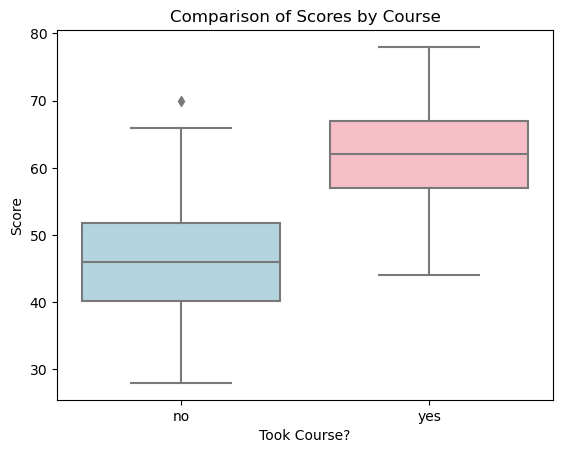

In [8]:
# Boxplot ilə kurs keçib-keçməyənlər üzrə nəticələr
sns.boxplot(x='course', y='score', data=sp, palette=['lightblue', 'lightpink'])
plt.title("Comparison of Scores by Course")
plt.xlabel("Took Course?")
plt.ylabel("Score")
plt.show()

## Qoşalaşmış Nümunə T testi - Paired-Sample T test

In [9]:
mat = pd.read_csv("math.csv")

mat.head()

,grade1,grade2
0,5.54,7.19
1,5.86,7.13
2,5.07,6.85
3,5.84,7.53
4,5.91,7.14


In [10]:
t_stat_paired, p_val_paired = stats.ttest_rel(mat['grade2'], mat['grade1'])
mean_diff = (mat['grade2'] - mat['grade1']).mean()
ci_paired = stats.t.interval(confidence=0.95, df=len(mat)-1, loc=mean_diff, scale=stats.sem(mat['grade2'] - mat['grade1']))

In [11]:
print("\nPaired-Sample T-test Results:")
print(f"t-statistic: {t_stat_paired:.4f}")
print(f"p-value: {p_val_paired:.4f}")
print(f"Mean difference (grade2 - grade1): {mean_diff:.2f}")
print(f"95% Confidence Interval for mean difference: ({ci_paired[0]:.2f}, {ci_paired[1]:.2f})")


Paired-Sample T-test Results:
t-statistic: 43.1549
p-value: 0.0000
Mean difference (grade2 - grade1): 1.18
95% Confidence Interval for mean difference: (1.12, 1.23)


## "One-Way ANOVA"

In [12]:
vit = pd.read_csv("vitamin1.csv")

vit.head()

,effort,dose
0,20.3,placebo
1,20.2,placebo
2,19.0,placebo
3,18.7,placebo
4,17.8,placebo


In [20]:
# varians bərabərliyinin yoxlanılması
groups = [vit[vit['dose'] == level]['effort'] for level in vit['dose'].unique()]
levene_stat_anova, levene_p_anova = stats.levene(*groups)

In [21]:
print("\nLevene's Test for One-Way ANOVA (Homogeneity of Variances):")
print(f"Statistic: {levene_stat_anova:.4f}")
print(f"p-value: {levene_p_anova:.4f}")


Levene's Test for One-Way ANOVA (Homogeneity of Variances):
Statistic: 0.7367
p-value: 0.4795


In [22]:
f_stat, p_val_anova = stats.f_oneway(*groups)

In [23]:
print("\nOne-Way ANOVA Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_val_anova:.4f}")


One-Way ANOVA Results:
F-statistic: 50.18
p-value: 0.0000


In [24]:
#İndi Tukey HSD testi ilə hansı doza qruplarının bir-birindən fərqləndiyini araşdıraq:
tukey = pairwise_tukeyhsd(endog=vit['effort'], groups=vit['dose'])
print("\nTukey's HSD Test Results:")
print(tukey)


Tukey's HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
high dose low dose  -3.3448    0.0 -4.3783 -2.3113   True
high dose  placebo  -4.3508    0.0 -5.4115 -3.2902   True
 low dose  placebo   -1.006 0.0434 -1.9888 -0.0232   True
---------------------------------------------------------


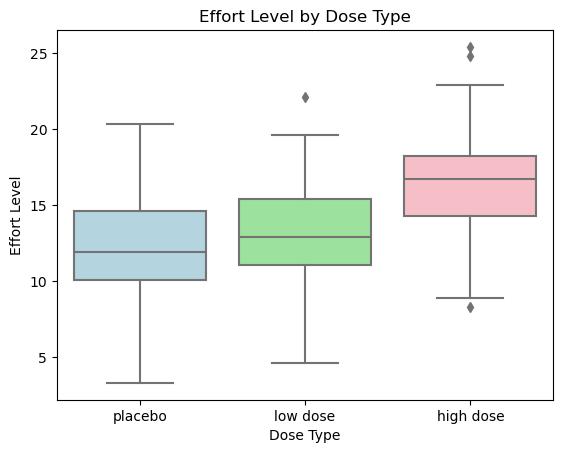

In [26]:
# Boxplot ilə effort dəyişəninə görə dozaların təsiri
sns.boxplot(x='dose', y='effort', data=vit, palette=['lightblue', 'lightgreen', 'lightpink'])
plt.title("Effort Level by Dose Type")
plt.xlabel("Dose Type")
plt.ylabel("Effort Level")
plt.show()

## "Two-Way ANOVA"

In [27]:
vit = pd.read_csv("vitamin2.csv")

vit.head()

,effort,dose,gender
0,9.5,placebo,male
1,11.0,placebo,male
2,8.3,placebo,male
3,9.0,placebo,male
4,10.4,placebo,male


In [28]:
model = ols('effort ~ C(dose) + C(gender) + C(dose):C(gender)', data=vit).fit()
anova_table = anova_lm(model, typ=2)

In [29]:
anova_table

,sum_sq,df,F,PR(>F)
C(dose),1305.846778,2.0,174.965787,3.628580e-59
C(gender),761.365630,1.0,204.025371,1.965825e-39
C(dose):C(gender),470.466259,2.0,63.036109,2.646047e-25
Residual,1992.738667,534.0,NaN,NaN


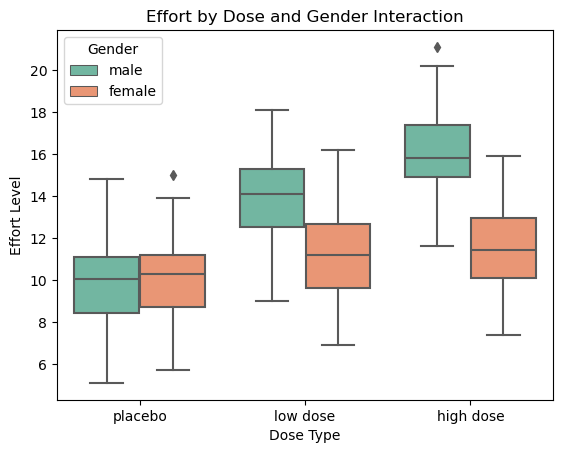

In [22]:
# Boxplot
sns.boxplot(x='dose', y='effort', hue='gender', data=vit, palette='Set2')
plt.title("Effort by Dose and Gender Interaction")
plt.xlabel("Dose Type")
plt.ylabel("Effort Level")
plt.legend(title="Gender")
plt.show()